In [100]:
import kagglehub
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Download data
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

df = pd.read_csv(f"{path}/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.shape

(768, 9)

In [ ]:
# data format
x= df.drop("Outcome",axis=1).values #axis = 0 is row, axis = 1 is column
y = df["Outcome"].values

In [77]:
X_train, x_test, Y_train, y_test = train_test_split(x, y,test_size=0.4)

In [78]:

y_test.shape

(308,)

In [86]:
#find k model
k_number = np.arange(1,9)

#empty array
train_score = np.empty(len(k_number))
test_score = np.empty(len(k_number))

In [87]:
for i,k in enumerate(k_number):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    train_score[i] = knn.score(X_train,Y_train)
    test_score[i] = knn.score(x_test,y_test)

    print(test_score[i]*100)

#knn.score (how it work)
#y_pred = knn.predict(X)
#accuracy = np.mean(y_pred == y)

#1. knn.predict(X_train) → the predicted labels on training data.
#2. Compares predicted labels with Y_train.
#3. Returns the fraction of correct predictions.

66.23376623376623
71.1038961038961
69.8051948051948
69.8051948051948
70.77922077922078
72.07792207792207
69.8051948051948
71.42857142857143


<function matplotlib.pyplot.show(close=None, block=None)>

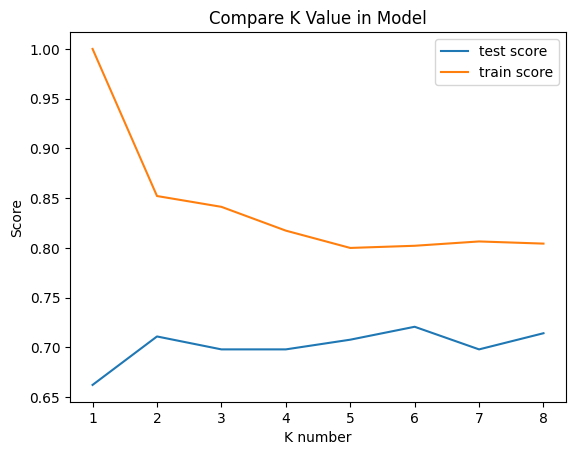

In [81]:
plt.title("Compare K Value in Model")
plt.plot(k_number, test_score,label="test score")
plt.plot(k_number, train_score,label="train score")
plt.legend()
plt.xlabel("K number")
plt.ylabel("Score")
plt.show

In [96]:
knn = KNeighborsClassifier(n_neighbors=6)

#train
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [97]:
#prediction
y_pred = knn.predict(x_test)

In [101]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       210
           1       0.58      0.44      0.50        98

    accuracy                           0.72       308
   macro avg       0.67      0.65      0.65       308
weighted avg       0.71      0.72      0.71       308

[[179  31]
 [ 55  43]]


In [107]:
pd.crosstab(y_test,y_pred, rownames=['Actually'],colnames=['Prediction'],margins=True)

Prediction,0,1,All
Actually,,,
0,179,31,210
1,55,43,98
All,234,74,308
